# Solve the following task
![task](./img/task.bmp)

Let's represent the task graphically and see what can be done to solve it

Import some stuff in order to be able to build plots:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

Set lines in space using general equation form:

In [2]:
line1 = {"A": 7.0, "B": 1.0, "C": 0.0}
line2 = {"A": 1.0, "B": -1.0, "C": 8.0}
point_J = (-1, 3)

Build the plot:

<function matplotlib.pyplot.show(*args, **kw)>

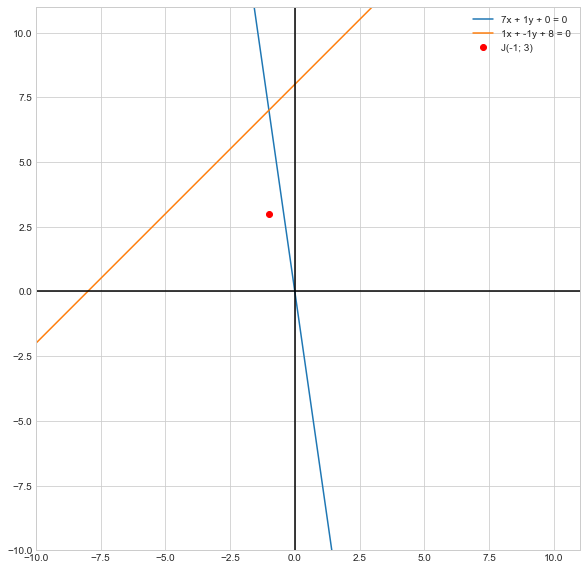

In [3]:
# set x-s and y-s for graphical objects we want to build
x = [i for i in range(-10, 11)]
y_line1 = [(-(line1["A"] / line1["B"]) * i) -\
               (line1["C"] / line1["B"]) for i in x]
y_line2 = [(-(line2["A"] / line2["B"]) * i) -\
               (line2["C"] / line2["B"]) for i in x]
x_J = [point_J[0]]
y_J = [point_J[1]]

# pre-configure plot
plt.figure(figsize=(20,10))

# set up functions
plt.plot(x, y_line1)
plt.plot(x, y_line2)
plt.plot(x_J, y_J, "ro")
plt.plot([i for i in range(-10, 12)], [0 for i in range(-10, 12)], "k-")
plt.plot([0 for i in range(-10, 12)], [i for i in range(-10, 12)], "k-")

# post-configure plot
plt.legend(["%(A)dx + %(B)dy + %(C)d = 0"\
                % {"A": line1["A"], "B": line1["B"], "C": line1["C"]},\
            "%(A)dx + %(B)dy + %(C)d = 0"\
                % {"A": line2["A"], "B": line2["B"], "C": line2["C"]},\
            "J(%(x)d; %(y)d)" % {"x": point_J[0], "y": point_J[1]}])
plt.xlim(-10, 11)
plt.ylim(-10, 11)
plt.gca().set_aspect('equal', adjustable='box')

# show the plot
plt.show

If we will look at plot, we'll see that we're able to find the circle radius by solving the system of equations, which consists of the distance between the circle center and the given point and the 2 given lines. The system looks as follows:

\begin{cases}
\frac{A_{1}x_{0} + B_{1}y_{0} + C_{1}}{\sqrt{A_{1}^2 + B_{1}^2}} = R
\\
\frac{A_{2}x_{0} + B_{2}y_{0} + C_{2}}{\sqrt{A_{2}^2 + B_{2}^2}} = R
\\
\sqrt{(x_{J} - x_{0})^2 + (y_{J} - y_{0})^2} = R
\end{cases}

In terms of given values, the equation will look as follows:

In [4]:
from IPython.display import Latex
Latex(r"""
\begin{cases}
\frac{%(A1)dx_{0} + %(B1)dy_{0} + %(C1)d}{\sqrt{%(A1)d^2 + %(B1)d^2}} = R
\\
\frac{%(A2)dx_{0} + %(B2)dy_{0} + %(C2)d}{\sqrt{%(A2)d^2 + %(B2)d^2}} = R
\\
\sqrt{(%(xJ)d - x_{0})^2 + (%(yJ)d - y_{0})^2} = R
\end{cases}
""" % {"A1": line1["A"], "B1": line1["B"], "C1": line1["C"],\
      "A2": line2["A"], "B2": line2["B"], "C2": line2["C"],\
      "xJ": point_J[0], "yJ": point_J[1]})

<IPython.core.display.Latex object>

Now solve the system:

In [10]:
from gekko import GEKKO
s = GEKKO()

x0 = s.Var(value=-5.0)
y0 = s.Var(value=-2.5)
R = s.Var(value=4.0)

s.Equation(((line1["A"] * x0 + line1["B"] * y0 + line1["C"])\
            /
            s.sqrt(line1["A"] ** 2 + line1["B"] ** 2)) == R)
s.Equation(((line2["A"] * x0 + line2["B"] * y0 + line2["C"])\
            /
            s.sqrt(line2["A"] ** 2 + line2["B"] ** 2)) == R)
s.Equation(((s.sqrt(point_J[0] - x0) ** 2) + ((point_J[1] - y0) ** 2)) == R)

s.solve(disp=False)
print("x0 = %(x0)s\ny0 = %(y0)s\n R = %(R)s"\
      % {"x0": str(x0.value), "y0": str(y0.value), "R": str(R.value)})

x0 = [64.7618]
y0 = [-14.9206]
 R = [62.00082]


Let's build a plot for our solution:

<function matplotlib.pyplot.show(*args, **kw)>

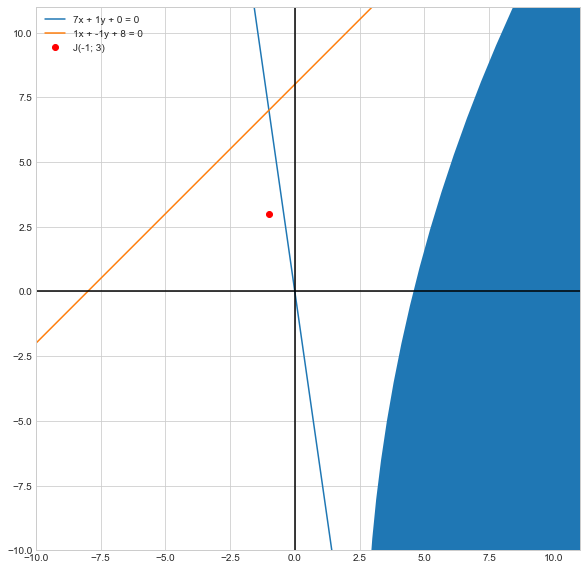

In [11]:
# set x-s and y-s for graphical objects we want to build
x = [i for i in range(-10, 11)]
y_line1 = [(-(line1["A"] / line1["B"]) * i) -\
               (line1["C"] / line1["B"]) for i in x]
y_line2 = [(-(line2["A"] / line2["B"]) * i) -\
               (line2["C"] / line2["B"]) for i in x]
x_J = [point_J[0]]
y_J = [point_J[1]]

# pre-configure plot
plt.figure(figsize=(20,10))

# set up functions
plt.plot(x, y_line1)
plt.plot(x, y_line2)
plt.plot(x_J, y_J, "ro")
plt.plot([i for i in range(-10, 12)], [0 for i in range(-10, 12)], "k-")
plt.plot([0 for i in range(-10, 12)], [i for i in range(-10, 12)], "k-")

circle = plt.Circle((x0.value[0], y0.value[0]), radius=R.value[0])
plt.gca().add_patch(circle)

# post-configure plot
plt.legend(["%(A)dx + %(B)dy + %(C)d = 0"\
                % {"A": line1["A"], "B": line1["B"], "C": line1["C"]},\
            "%(A)dx + %(B)dy + %(C)d = 0"\
                % {"A": line2["A"], "B": line2["B"], "C": line2["C"]},\
            "J(%(x)d; %(y)d)" % {"x": point_J[0], "y": point_J[1]}])
plt.xlim(-10, 11)
plt.ylim(-10, 11)
plt.gca().set_aspect('equal', adjustable='box')

# show the plot
plt.show

The task is solved, but incorrectly!